In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install lightgbm xgboost catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


# 1. Data Understanding

## Import packages

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

import xgboost as xgb
import lightgbm as lgb
import catboost as cb

## Load Data

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Dami/housepricesadvancedregressiontechniques/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Dami/housepricesadvancedregressiontechniques/test.csv")

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Size

In [ ]:
# Ukuran data
print(f"Jumlah baris dan kolom (Train): {train.shape}")
print(f"Jumlah baris dan kolom (Test) : {test.shape}")

Jumlah baris dan kolom (Train): (1460, 81)
Jumlah baris dan kolom (Test) : (1459, 80)


In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Fitur Numerik dan Kategorial

In [ ]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = train.select_dtypes(include=['object']).columns.tolist()
print(f"Numerik: {numeric_features}")
print(f"Kategorikal: {categorical_features}")

Numerik: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Kategorikal: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',

## Distribusi SalePrice

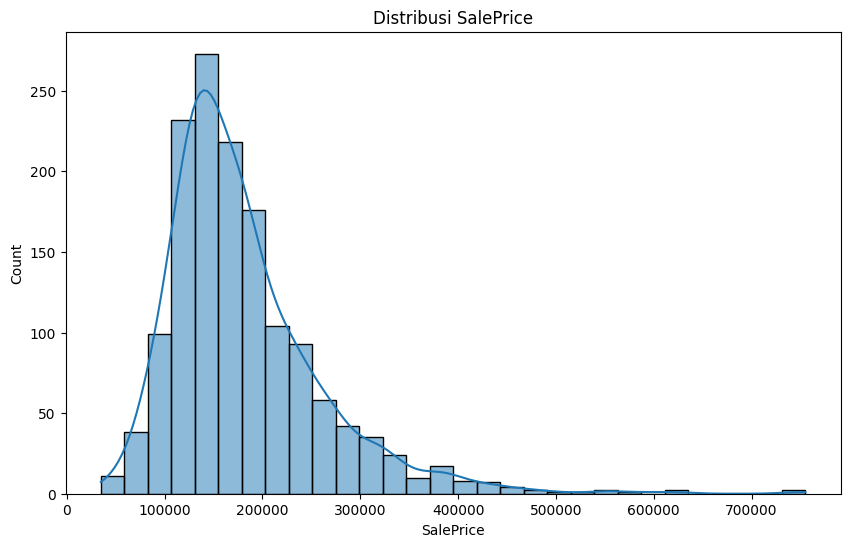

In [ ]:
# Distribution of target
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice'], kde=True, bins=30)
plt.title('Distribusi SalePrice')
plt.show()

###  Interpretasi
- **Distribusi Positif Skew**  
  Mayoritas harga rumah berada di kisaran rendah; ekor memanjang ke kanan menunjukkan adanya outlier.

- **Harga Umum (Mode)**  
  Puncak distribusi berada di sekitar **120.000 – 150.000**.

- **Outlier**  
  Terdapat rumah dengan harga di atas **500.000**, _bahkan hingga_ **750.000**.

- **Implikasi Model**  
  Distribusi tidak normal → perlu **transformasi log** jika digunakan untuk model yang mengasumsikan normalitas (misal: regresi linear).

## Correlation Heatmap Semua Fitur (Numerik + Kategorikal)

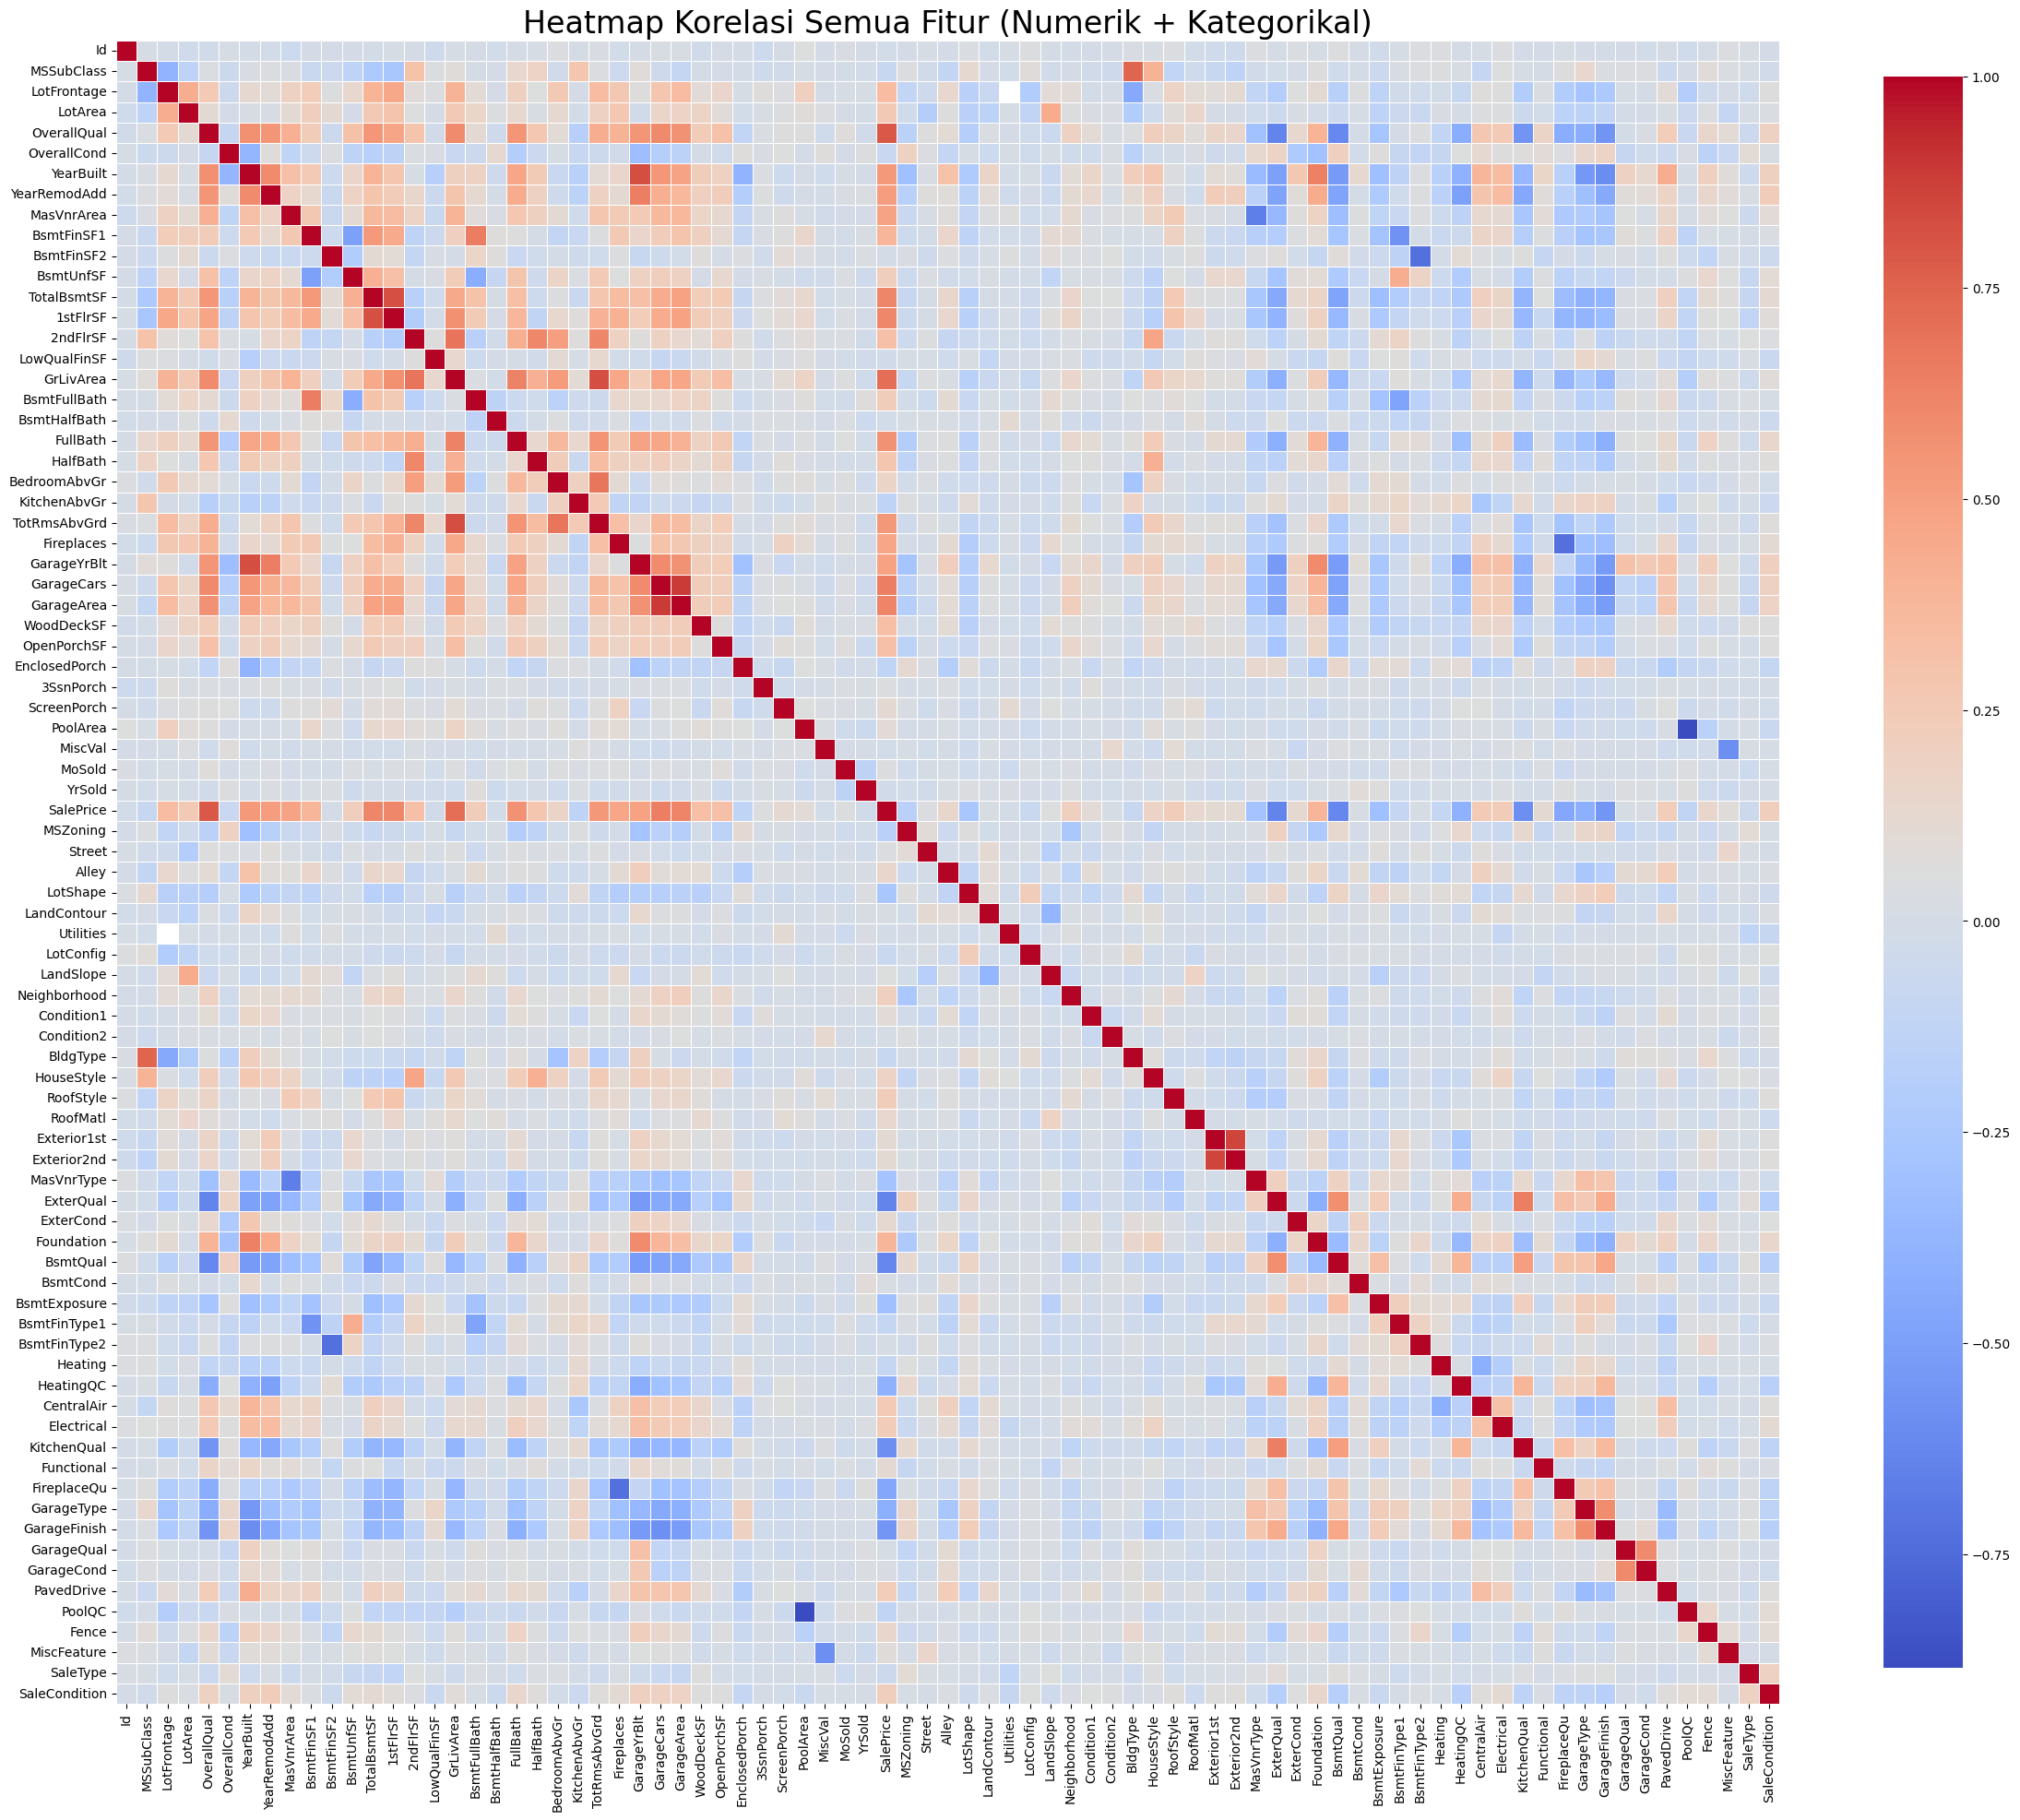

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Pisahkan fitur numerik dan kategorikal
numeric_feats = train.select_dtypes(include=['int64', 'float64'])
categorical_feats = train.select_dtypes(include=['object'])

# Label Encoding untuk fitur kategorikal
label_encoded = categorical_feats.copy()
le = LabelEncoder()
for col in label_encoded.columns:
    label_encoded[col] = le.fit_transform(label_encoded[col].astype(str))

# Gabungkan numerik + label encoded
combined_data = pd.concat([numeric_feats, label_encoded], axis=1)

# Hitung korelasi
corr_matrix = combined_data.corr()

# Visualisasi heatmap
plt.figure(figsize=(24, 22))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=False,
    fmt='.2f',
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title('Heatmap Korelasi Semua Fitur (Numerik + Kategorikal)', fontsize=24)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

## Missing Values


 Missing Value Summary for Train:
              Missing Count  Missing %
PoolQC                 1453  99.520548
MiscFeature            1406  96.301370
Alley                  1369  93.767123
Fence                  1179  80.753425
MasVnrType              872  59.726027
FireplaceQu             690  47.260274
LotFrontage             259  17.739726
GarageType               81   5.547945
GarageYrBlt              81   5.547945
GarageFinish             81   5.547945
GarageQual               81   5.547945
GarageCond               81   5.547945
BsmtExposure             38   2.602740
BsmtFinType2             38   2.602740
BsmtQual                 37   2.534247
BsmtCond                 37   2.534247
BsmtFinType1             37   2.534247
MasVnrArea                8   0.547945
Electrical                1   0.068493

 Missing Value Summary for Test:
              Missing Count  Missing %
PoolQC                 1456  99.794380
MiscFeature            1408  96.504455
Alley                  1352  92.66

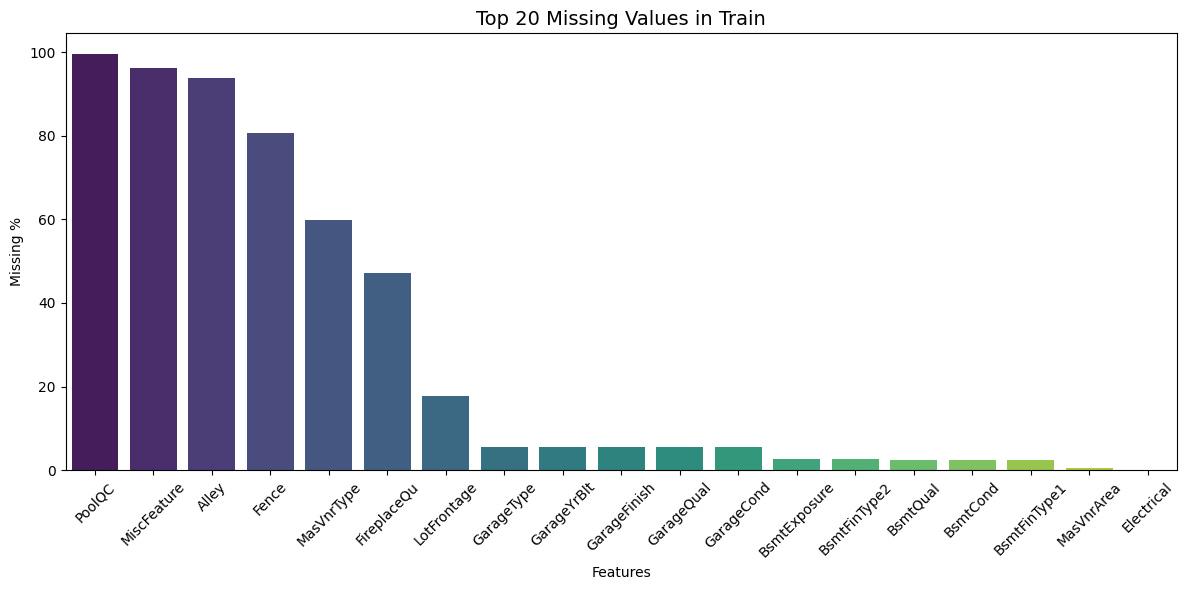

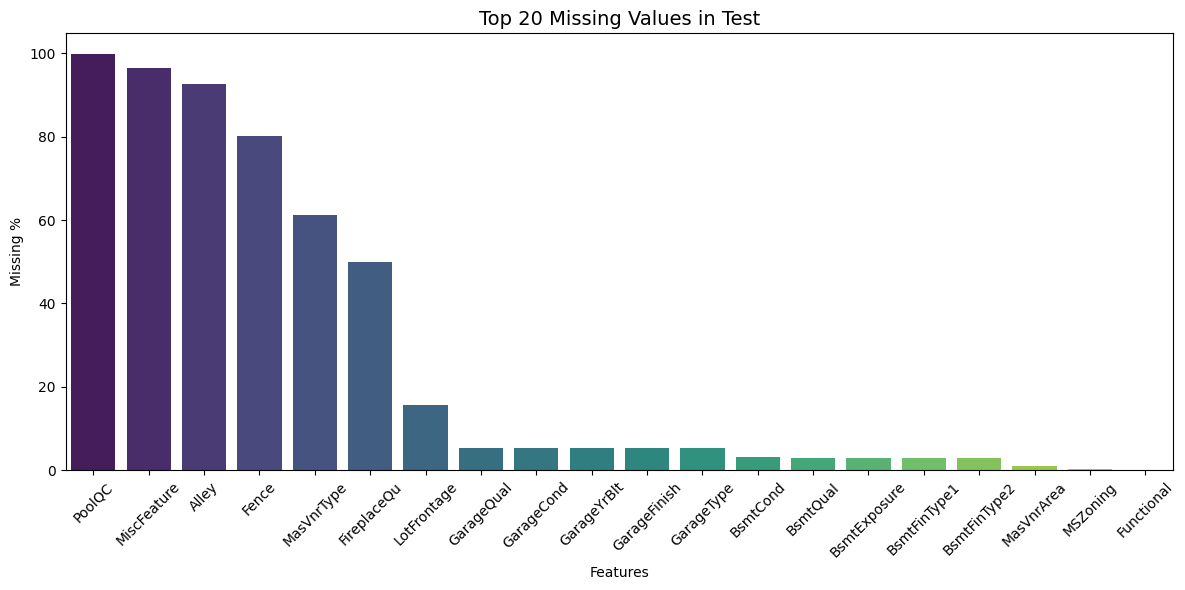

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def missing_value_summary(df, name='Dataset'):
    # Hitung jumlah dan persentase missing values
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing_percent = (missing / len(df)) * 100

    # Gabung ke dalam DataFrame
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Missing %': missing_percent
    }).sort_values(by='Missing %', ascending=False)

    print(f"\n Missing Value Summary for {name}:")
    print(missing_df)

    return missing_df

def plot_missing_values(missing_df, name='Dataset', top_n=20):
    if missing_df.empty:
        print(f"\n No missing values in {name}.")
        return

    # Plot top N missing features
    plt.figure(figsize=(12,6))
    sns.barplot(
        x=missing_df.head(top_n).index,
        y=missing_df['Missing %'].head(top_n),
        palette='viridis'
    )
    plt.title(f"Top {top_n} Missing Values in {name}", fontsize=14)
    plt.xlabel("Features")
    plt.ylabel("Missing %")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


missing_train_df = missing_value_summary(train, name='Train')
missing_test_df  = missing_value_summary(test, name='Test')

plot_missing_values(missing_train_df, name='Train')
plot_missing_values(missing_test_df, name='Test')

###  Analisis Missing Values

####  Data Train
- Fitur dengan persentase missing tertinggi:
  - `PoolQC` (99.79%)
  - `MiscFeature` (96.30%)
  - `Alley` (93.84%)
  - `Fence` (80.07%)
- Fitur-fitur ini mayoritas menunjukkan bahwa nilai yang hilang bisa berarti **ketiadaan fitur** (misalnya: tidak ada kolam renang, pagar, atau gang).

####  Data Test
- Pola missing mirip dengan data train:
  - `PoolQC` (99.79%)
  - `MiscFeature` (96.50%)
  - `Alley` (92.67%)
  - `Fence` (80.12%)

####  Implikasi dan Saran Penanganan
- **Imputasi berbasis domain:**
  - Gunakan nilai `'None'` atau `'No'` untuk fitur kategorikal seperti `PoolQC`, `Alley`, `Fence`, dll., karena menunjukkan fitur tidak tersedia.
- **Imputasi numerik:**
  - Untuk fitur numerik seperti `LotFrontage`, pertimbangkan imputasi menggunakan **median** berdasarkan `Neighborhood` untuk mempertahankan distribusi lokal.
- **Drop jika tidak relevan:**
  - Jika fitur memiliki missing value tinggi **dan** tidak informatif, bisa dipertimbangkan untuk **dihapus** dari model.


# 2. Data Preprocessing

## Feature Correlation

In [ ]:
def select_features_by_correlation(data, target='SalePrice', threshold=0.5):

    numeric_data = data.select_dtypes(include=['number']).copy()

    corr = numeric_data.corr()[target].abs()

    filtered_corr = corr[~((corr.index != target) & (corr.index.str.contains(target, case=False)))]

    selected = filtered_corr[(filtered_corr >= threshold) & (filtered_corr.index != target)].index.tolist()

    return selected

## Heatmap Feature Correlation

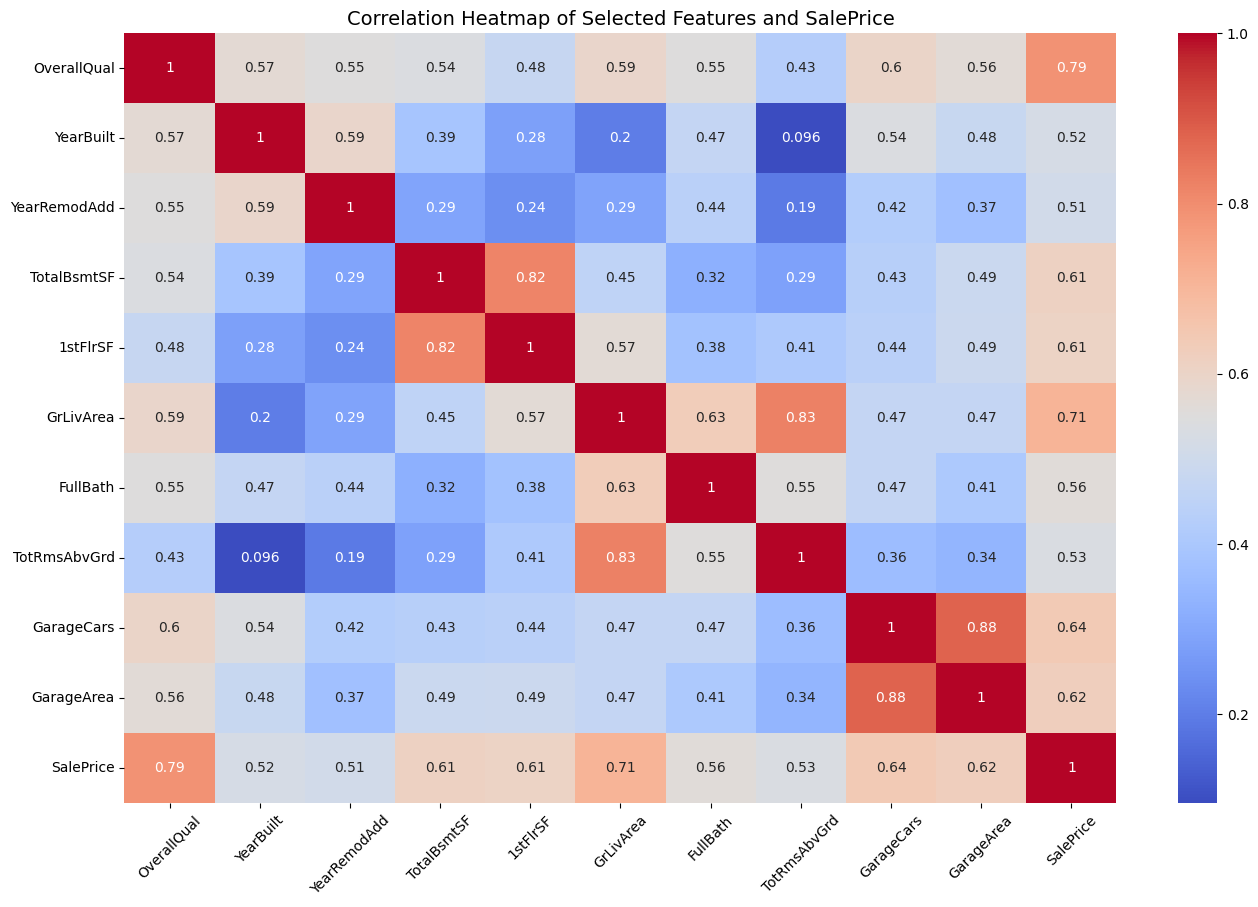

In [ ]:
selected_features = select_features_by_correlation(train, target='SalePrice', threshold=0.5)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
sns.heatmap(train[selected_features + ['SalePrice']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Selected Features and SalePrice", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
def fill_missing(df, selected_cols):
    for col in selected_cols:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df

train = fill_missing(train, selected_features)
test = fill_missing(test, selected_features)

In [ ]:
def remove_outliers(df, features, z_thresh=3):
    for col in features:
        z = (df[col] - df[col].mean()) / df[col].std()
        df = df[(z > -z_thresh) & (z < z_thresh)]
    return df

train = remove_outliers(train, selected_features)

In [ ]:
def fix_skewness(df, threshold=0.5):
    skewed_feats = df[selected_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    skewed_feats = skewed_feats[skewed_feats > threshold]
    for feat in skewed_feats.index:
        df[feat] = np.log1p(df[feat])
    return df

train = fix_skewness(train)
test = fix_skewness(test)

In [ ]:
y = np.log1p(train['SalePrice'])

X = train[selected_features]
X_test = test[selected_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Building Model

Tuning LightGBM...
Best params for LightGBM: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'num_leaves': 15}
Tuning XGBoost...
Best params for XGBoost: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200}
Tuning CatBoost...
Best params for CatBoost: {'depth': 4, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.05}

Stacked Model Performance:

Train Set:
  RMSE: 0.1213
  MAE:  0.0873
  R²:   0.9001

Validation Set:
  RMSE: 0.1465
  MAE:  0.0996
  R²:   0.8367


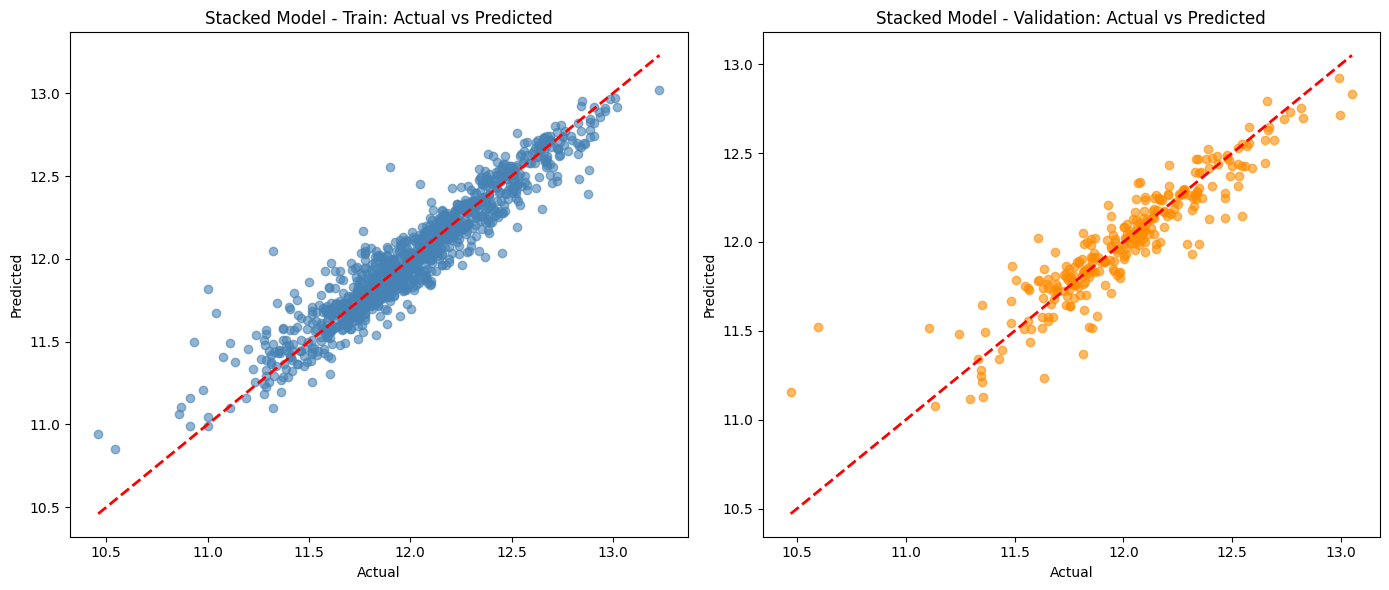

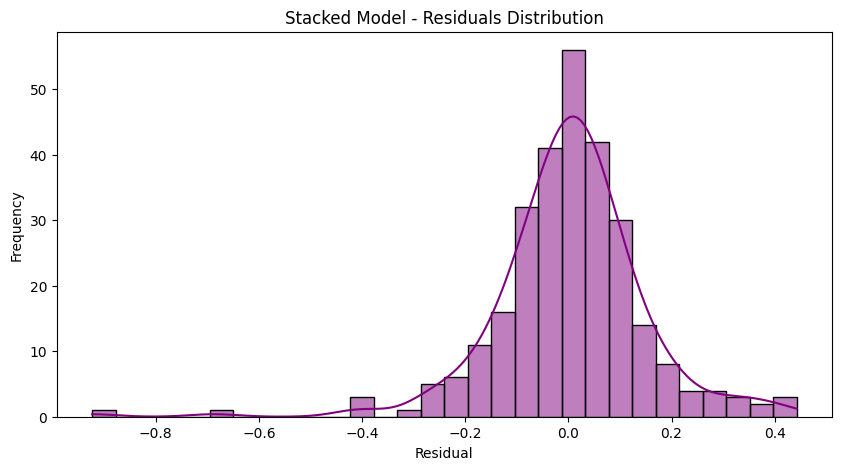

In [ ]:
# Import library untuk manipulasi data dan visualisasi
import numpy as np  # Untuk komputasi numerik, seperti array dan operasi matematika
import pandas as pd  # Untuk manipulasi data tabular (DataFrame)
import matplotlib.pyplot as plt  # Untuk membuat visualisasi plot
import seaborn as sns  # Library visualisasi berbasis matplotlib dengan style yang lebih menarik

# Import modul dari scikit-learn untuk machine learning
from sklearn.model_selection import GridSearchCV  # Untuk tuning hyperparameter dengan grid search
from sklearn.linear_model import Ridge  # Model regresi linear dengan regularisasi L2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Metrik evaluasi model

# Import model dari library eksternal
import lightgbm as lgb  # LightGBM: model boosting dari Microsoft, cepat dan efisien
import xgboost as xgb  # XGBoost: model boosting yang terkenal umum untuk ML
import catboost as cb  # CatBoost: model boosting Yang digunakan untuk data kategorikal

# Fungsi untuk tuning model dengan GridSearchCV
def tune_model(model, param_grid, X_train, y_train, name=""):
    print(f"Tuning {name}...")  # Cetak nama model yang sedang dituning
    grid = GridSearchCV(model, param_grid, scoring='neg_root_mean_squared_error', cv=10, verbose=0)
    # Lakukan grid search cross-validation
    grid.fit(X_train, y_train)  # Latih model pada data pelatihan
    print(f"Best params for {name}: {grid.best_params_}")  # Tampilkan parameter terbaik
    return grid.best_estimator_  # Kembalikan model terbaik

# Fungsi untuk melatih ketiga model (LGBM, XGBoost, CatBoost)
def train_models(X_train, y_train):
    models = {}  # Dictionary untuk menyimpan model

    # LightGBM
    lgb_model = lgb.LGBMRegressor(random_state=42, verbose=-1, reg_alpha=1.0, reg_lambda=1.0)
    lgb_params = {  # Parameter yang akan dituning untuk LGBM
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05],
        'num_leaves': [15, 31],
        'max_depth': [1, 2, 3],
    }
    models['lgb'] = tune_model(lgb_model, lgb_params, X_train, y_train, "LightGBM")

    # XGBoost
    xgb_model = xgb.XGBRegressor(random_state=42, reg_alpha=1.0, reg_lambda=1.0)
    xgb_params = {  # Parameter tuning untuk XGBoost
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05],
        'max_depth': [1, 2],
    }
    models['xgb'] = tune_model(xgb_model, xgb_params, X_train, y_train, "XGBoost")

    # CatBoost
    cat_model = cb.CatBoostRegressor(silent=True, random_state=42)
    cat_params = {  # Parameter tuning untuk CatBoost
        'iterations': [200, 300],
        'learning_rate': [0.01, 0.05],
        'depth': [3, 4],
        'l2_leaf_reg': [5, 10],
    }
    models['cat'] = tune_model(cat_model, cat_params, X_train, y_train, "CatBoost")

    return models  # Kembalikan semua model hasil training dan tuning

# Fungsi stacking: gabungkan prediksi semua model sebagai input ke meta-model
def stacking(models, X_train, y_train, X_val, y_val):
    # Prediksi dari model dasar untuk data training dan validasi
    train_preds = np.column_stack([models[m].predict(X_train) for m in models])
    val_preds = np.column_stack([models[m].predict(X_val) for m in models])

    meta_model = Ridge(alpha=1.0)  # Gunakan Ridge Regression sebagai meta-model
    meta_model.fit(train_preds, y_train)  # Latih meta-model menggunakan prediksi dari base model

    train_meta_pred = meta_model.predict(train_preds)  # Prediksi hasil training dari meta-model
    val_meta_pred = meta_model.predict(val_preds)  # Prediksi hasil validasi dari meta-model

    return meta_model, train_meta_pred, val_meta_pred  # Kembalikan model dan hasil prediksi

# Fungsi evaluasi untuk menghitung metrik performa model
def evaluate_predictions(y_train, train_pred, y_val, val_pred, name="Model"):
    print(f"\n{name} Performance:")

    print("\nTrain Set:")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_train, train_pred)):.4f}")  # Root Mean Squared Error
    print(f"  MAE:  {mean_absolute_error(y_train, train_pred):.4f}")  # Mean Absolute Error
    print(f"  R²:   {r2_score(y_train, train_pred):.4f}")  # R-squared (koefisien determinasi)

    print("\nValidation Set:")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_val, val_pred)):.4f}")
    print(f"  MAE:  {mean_absolute_error(y_val, val_pred):.4f}")
    print(f"  R²:   {r2_score(y_val, val_pred):.4f}")

# Fungsi visualisasi prediksi vs aktual
def plot_predictions(y_true_train, y_pred_train, y_true_val, y_pred_val, name="Model"):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Buat dua subplot sejajar

    # Plot 1: Data training
    axes[0].scatter(y_true_train, y_pred_train, alpha=0.6, color='steelblue')  # Titik prediksi
    axes[0].plot([y_true_train.min(), y_true_train.max()],
                 [y_true_train.min(), y_true_train.max()],
                 'r--', lw=2)  # Garis referensi diagonal
    axes[0].set_title(f'{name} - Train: Actual vs Predicted')
    axes[0].set_xlabel('Actual')
    axes[0].set_ylabel('Predicted')

    # Plot 2: Data validasi
    axes[1].scatter(y_true_val, y_pred_val, alpha=0.6, color='darkorange')
    axes[1].plot([y_true_val.min(), y_true_val.max()],
                 [y_true_val.min(), y_true_val.max()],
                 'r--', lw=2)
    axes[1].set_title(f'{name} - Validation: Actual vs Predicted')
    axes[1].set_xlabel('Actual')
    axes[1].set_ylabel('Predicted')

    plt.tight_layout()
    plt.show()  # Tampilkan plot

# Fungsi visualisasi distribusi residual (kesalahan prediksi)
def plot_residuals(y_true_val, y_pred_val, name="Model"):
    residuals = y_true_val - y_pred_val  # Hitung selisih antara nilai aktual dan prediksi
    plt.figure(figsize=(10, 5))
    sns.histplot(residuals, kde=True, bins=30, color='purple')  # Histogram dengan KDE
    plt.title(f'{name} - Residuals Distribution')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.show()

# Pipeline utama: training model, stacking, evaluasi, dan visualisasi
models = train_models(X_train, y_train)  # Latih semua base model
meta_model, train_stack_pred, val_stack_pred = stacking(models, X_train, y_train, X_val, y_val)  # Lakukan stacking
evaluate_predictions(y_train, train_stack_pred, y_val, val_stack_pred, name="Stacked Model")  # Evaluasi performa
plot_predictions(y_train, train_stack_pred, y_val, val_stack_pred, name="Stacked Model")  # Plot prediksi
plot_residuals(y_val, val_stack_pred, name="Stacked Model")  # Plot residual

##  Interpretasi Hasil Model Ensemble (Stacking)

Model ini menggunakan pendekatan **stacking ensemble** yang menggabungkan tiga model terbaik:
- LightGBM
- XGBoost
- CatBoost  
Dengan **Ridge Regression** sebagai meta-model.

---

##  Hyperparameter Terbaik

| Model      | Hyperparameter Terbaik                                                                 |
|------------|-----------------------------------------------------------------------------------------|
| LightGBM   | `learning_rate`: 0.05, `max_depth`: 3, `n_estimators`: 200, `num_leaves`: 15           |
| XGBoost    | `learning_rate`: 0.05, `max_depth`: 2, `n_estimators`: 200                             |
| CatBoost   | `learning_rate`: 0.05, `depth`: 4, `iterations`: 300, `l2_leaf_reg`: 5                 |

> 💡 Hyperparameter ditentukan melalui proses Grid Search + 10-fold Cross Validation.

---

##  Evaluasi Kinerja Model

###  Training Set
- **RMSE (Root Mean Squared Error)**: `0.1213`  
- **MAE (Mean Absolute Error)**: `0.0873`  
- **R² (R-squared)**: `0.9001`

###  Validation Set
- **RMSE**: `0.1465`  
- **MAE**: `0.0996`  
- **R²**: `0.8367`

---

##  Interpretasi

1. **Akurasi Tinggi**  
   Nilai R² yang tinggi menunjukkan bahwa model sangat baik dalam menjelaskan variansi data.

2. **Tidak Overfitting**  
   Perbedaan metrik antara training dan validation kecil, artinya model mampu melakukan generalisasi dengan baik.

3. **Kesalahan Prediksi Rendah**  
   Nilai RMSE dan MAE yang kecil menandakan bahwa kesalahan rata-rata dalam prediksi cukup rendah.

---

##  Analisis Visual

- **Plot Prediksi vs Aktual**:  
  Titik-titik prediksi mendekati garis diagonal (garis ideal), menunjukkan prediksi yang akurat.

- **Distribusi Residuals**:  
  Residual tersebar merata dan simetris di sekitar nol. Ini mengindikasikan tidak adanya bias sistematis.

---

##  Kesimpulan

Model stacking ensemble yang menggabungkan LightGBM, XGBoost, dan CatBoost dengan Ridge Regression sebagai meta-model menunjukkan performa yang sangat baik. Hasil evaluasi menunjukkan nilai akurasi tinggi pada data pelatihan maupun validasi, dengan nilai R² sebesar **0.9001** pada training dan **0.8367** pada validasi. Hal ini menandakan bahwa model memiliki kemampuan generalisasi yang baik dan tidak mengalami overfitting.

Nilai error yang rendah (RMSE dan MAE) menunjukkan bahwa model mampu memprediksi harga rumah secara akurat dan konsisten. Distribusi residual yang simetris dan grafik prediksi yang mendekati garis aktual memperkuat bukti bahwa model bekerja secara optimal.

Secara keseluruhan, model ini sangat layak untuk digunakan dalam memprediksi harga rumah pada data nyata. Namun, untuk meningkatkan akurasi lebih lanjut, disarankan melakukan eksplorasi lanjutan pada feature engineering, penambahan data, atau pengujian meta-model lain sebagai pembanding.

---

## Rekomendasi Lanjutan

- Lakukan **feature engineering** untuk menambah informasi baru ke dalam model.
- Coba meta-model lain seperti **Gradient Boosting** untuk perbandingan.

In [ ]:
import pickle

# Bungkus komponen
model_bundle = {
    'meta_model': meta_model,
    'base_models': models,
    'scaler': scaler
}

with open('/content/drive/MyDrive/Dami/housepricesadvancedregressiontechniques/stacked_model.pkl', 'wb') as f:
    pickle.dump(model_bundle, f)

print("Model berhasil disimpan ke Google Drive.")

Model berhasil disimpan ke Google Drive.


In [ ]:
import pickle

# Load kembali model dari file
with open('/content/drive/MyDrive/Dami/housepricesadvancedregressiontechniques/stacked_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Akses komponen
meta_model_loaded = loaded_model['meta_model']
base_models_loaded = loaded_model['base_models']
scaler_loaded = loaded_model['scaler']

print("Model berhasil dimuat dari Google Drive.")

Model berhasil dimuat dari Google Drive.


In [ ]:
import pickle

with open('/content/drive/MyDrive/Dami/housepricesadvancedregressiontechniques/stacked_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print(loaded_model.keys())
print(loaded_model['base_models']['lgb'].feature_name_)


dict_keys(['meta_model', 'base_models', 'scaler'])
['Column_0', 'Column_1', 'Column_2', 'Column_3', 'Column_4', 'Column_5', 'Column_6', 'Column_7', 'Column_8', 'Column_9']
